# Segmenting and Clustering New York City

## Applied Data Science Capstone Peer-Graded Assignment

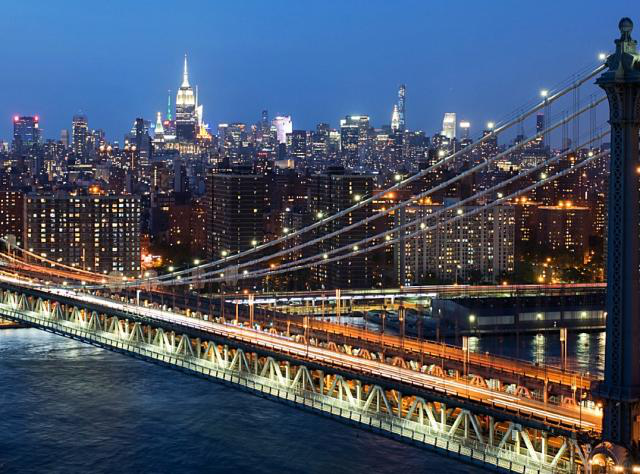

In [70]:
from PIL import Image
import requests
url = 'https://assets.simpleviewinc.com/simpleview/image/upload/c_fill,h_474,q_75,w_640/v1/clients/newyorkstate/5232359e_e163_475c_abe3_0f20af112a8c_ae020bfc-a771-4564-87b7-479fbe55735d.jpg'
img = Image.open(requests.get(url, stream=True).raw)
img

## Introduction

The City of New York, usually called either New York City (NYC) or simply New York (NY), is the most populous city in the United States. With an estimated 2018 population of 8,398,748 distributed over a land area of about 302.6 square miles (784 km2), New York is also the most densely populated major city in the United States.

Located at the southern tip of the state of New York, the city is the center of the New York metropolitan area, the largest metropolitan area in the world by urban landmass and one of the world's most populous megacities, with an estimated 19,979,477 people in its 2018 Metropolitan Statistical Area and 22,679,948 residents in its Combined Statistical Area.  
A global power city, New York City has been described as the cultural, financial, and media capital of the world, and exerts a significant impact upon commerce, entertainment, research, technology, education, politics, tourism, art, fashion, and sports. The city's fast pace has inspired the term New York minute. Home to the headquarters of the United Nations, New York is an important center for international diplomacy.

As the city grows and develops, it becomes increasingly important to examine and understand it quantitiatively.

Developers, policy makers and/or city planners have an interest in answering the following questions:

1. What neighbourhoods have the highest crime?
2. Is population density correlated to crime level?
3. Using Foursquare data, what venues are most common in different locations within the city?
4. Does a specific neighborhood of New York City really need a new coffee shop?

Knowing this would

## Data

#### To understand and explore we will need the following City of New York City Open Data:

- Open Data Site: https://data.cityofnewyork.us/
- New York City Neighbourhoods: https://data.cityofnewyork.us/City-Government/Neighborhood-Tabulation-Areas/cpf4-rkhq
- New York City Census: https://data.cityofnewyork.us/City-Government/New-York-City-Population-By-Neighborhood-Tabulatio/swpk-hqdp
- New York Points of Interest: https://data.cityofnewyork.us/City-Government/Points-Of-Interest/rxuy-2muj
- NYPD police precintcs: https://data.cityofnewyork.us/Public-Safety/Police-Precincts/78dh-3ptz
- NYPD complaints to date records: https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Current-Year-To-Date-/5uac-w243
- Foursquare Developers Access to venue data: https://foursquare.com/


Using this data will allow exploration and examination to answer the questions.

**Neighborhood-Tabulation-Area** provide a geojson that segment the urban area into the different neighbourhoods.

**New-York-City-Population-By-Neighborhood-Tabulation** include the population numbers by Neighbourhood population areas.  
**Columns in this Dataset:**
- Borough
- Year
- FIPS County Code
- NTA Code
- NTA Name
- Population

**Points-Of-Interest** provide a json listing a compilation of what the different city agencies consider to be a Common Place or Place/Point of Interest.

**Police-Precincts** provide a geojson that segment the urban area into the different neighbourhoods.

**NYPD-Complaint-Data-Current-Year-To-Date** is a breakdown of every arrest effected in NYC by the NYPD during the current year.
Data is manually extracted every quarter and reviewed by the Office of Management Analysis and Planning, each record represents an arrest effected in NYC by the NYPD and includes information about the type of crime, the location and time of enforcement.  
**Columns in this Dataset:**
- CMPLNT_NUM: Randomly generated persistent ID for each complaint
- ADDR_PCT_CD: The precinct in which the incident occurred
- BORO_NM: The name of the borough in which the incident occurred
- CMPLNT_FR_DT: Exact date of occurrence for the reported event (or starting date of occurrence, if CMPLNT_TO_DT exists)
- CMPLNT_FR_TM: Exact time of occurrence for the reported event (or starting time of occurrence, if CMPLNT_TO_TM exists)
- CMPLNT_TO_DT: Ending date of occurrence for the reported event, if exact time of occurrence is unknown
- CMPLNT_TO_TM: Ending time of occurrence for the reported event, if exact time of occurrence is unknown
- CRM_ATPT_CPTD_CD: Indicator of whether crime was successfully completed or attempted, but failed or was interrupted prematurely
- HADEVELOPT: Name of NYCHA housing development of occurrence, if applicable
- HOUSING_PSA: Development Level Code
- JURISDICTION_CODE: Jurisdiction responsible for incident. Either internal, like Police(0), Transit(1), and Housing(2); or external(3), like Correction, Port Authority, etc.
- JURIS_DESC: Description of the jurisdiction code
- KY_CD: Three digit offense classification code
- LAW_CAT_CD: Level of offense: felony, misdemeanor, violation
- LOC_OF_OCCUR_DESC: Specific location of occurrence in or around the premises; inside, opposite of, front of, rear of
- OFNS_DESC: Description of offense corresponding with key code
- PARKS_NM: Name of NYC park, playground or greenspace of occurrence, if applicable (state parks are not included)
- PATROL_BORO: The name of the patrol borough in which the incident occurred
- PD_CD: Three digit internal classification code (more granular than Key Code)
- PD_DESC: Description of internal classification corresponding with PD code (more granular than Offense Description)
- PREM_TYP_DESC: Specific description of premises; grocery store, residence, street, etc.
- RPT_DT: Date event was reported to police
- STATION_NAME: Transit station name
- SUSP_AGE_GROUP: Suspect’s Age Group
- SUSP_RACE: Suspect’s Race Description
- SUSP_SEX: Suspect’s Sex Description
- TRANSIT_DISTRICT: Transit district in which the offense occurred.
- VIC_AGE_GROUP: Victim’s Age Group
- VIC_RACE: Victim’s Race Description
- VIC_SEX: Victim’s Sex Description
- X_COORD_CD: X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)
- Y_COORD_CD: Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)
- Latitude: Midblock Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)
- Longitude: Midblock Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)
- Lat_Lon: Location

The neighbourhood data will enable us to properly group crime by neighbourhood.
The Census data will enable us to then compare the population density to examine if areas of highest crime are also most densely populated.

## Methodology

All steps are referenced beleow in the Analysis section during next week assignment.

The methodology will include:

1. Loading each data set
2. Examine the crime frequency by neighbourhood
3. Study the crime types and then pivot analysis of crime type frequency by neighbourhood
4. Understand correlation between crimes and population density
5. Perform k-means statisical analysis on venues by locations of interest based on findings from crimes and neighbourhood
6. Determine which venues are most common statistically in the region of greatest crime count then in all other locations of interest.
7. Determine if an area, such as the Bronx needs a coffee shop.

## Loading data

After loading the applicable libraries, the referenced geojson neighbourhood data was loaded from the NYC (New York City) Open Data site. This dataset uses block polygon shape coordinates which are better for visualization and comparison. The City also uses Ward data but the Neighbourhood location data is more accurate and includes more details.  
The same type of dataset was then loaded for the population density from the NYC Census tracts.

The dataset NYPD-Arrest-Data-Year-to-Date was loaded from the NYC Open Data site, under the Public Safety domain, for the analysis. It's interesting to note the details of this dataset are aggregated by neighbourhood. It is not an exhaustive set by not including all crimes (violent offenses) nor specific location data of the crime but is referenced by neighbourhood.

## Analysis

#### Loading libraries

In [86]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
# from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# for webscraping import Beautiful Soup 
from bs4 import BeautifulSoup

import xml

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [87]:
# loading neighbourhoods data
r = requests.get('https://data.cityofnewyork.us/resource/q2z5-ai38.json')
nyc_geo = r.json()

In [88]:
nyc_geo[0]

{'boro_code': '3',
 'boro_name': 'Brooklyn',
 'county_fips': '047',
 'ntacode': 'BK88',
 'ntaname': 'Borough Park',
 'shape_area': '54005019.0709',
 'shape_leng': '39247.2280277',
 'the_geom': {'coordinates': [[[[-73.97604935657381, 40.631275905646774],
     [-73.97716511994669, 40.63074665412933],
     [-73.97699848928193, 40.629871496125375],
     [-73.9768496430902, 40.6290885814784],
     [-73.97669604371914, 40.628354564208756],
     [-73.97657775689153, 40.62757318681896],
     [-73.9765146210018, 40.627294490493874],
     [-73.97644970441577, 40.627008255472994],
     [-73.97623453682755, 40.625976350730234],
     [-73.97726150032737, 40.6258527728136],
     [-73.97719665645002, 40.62510197855896],
     [-73.97710959292857, 40.62494825969152],
     [-73.97694382374165, 40.624052750014684],
     [-73.9768346520651, 40.62348104194568],
     [-73.97675209645574, 40.623013312325725],
     [-73.97656583927008, 40.6219949031937],
     [-73.97695070814679, 40.62163000717454],
     [-73

In [89]:
# Loading demographic data
nyc_demog = pd.read_csv('https://data.cityofnewyork.us/resource/swpk-hqdp.csv')
nyc_demog=nyc_demog[nyc_demog.year==2010].reset_index()
nyc_demog.drop(['index'],axis=1,inplace=True)
nyc_demog.rename(columns={'borough':'Borough', 'year':'Year', 'fips_county_code':'CountryCode',
                         'nta_code': 'NTACode', 'nta_name':'NTAName', 'population':'Population'}, inplace=True)
nyc_demog.head()

,Borough,Year,CountryCode,NTACode,NTAName,Population
0,Bronx,2010,5,BX01,Claremont-Bathgate,31078
1,Bronx,2010,5,BX03,Eastchester-Edenwald-Baychester,34517
2,Bronx,2010,5,BX05,Bedford Park-Fordham North,54415
3,Bronx,2010,5,BX06,Belmont,27378
4,Bronx,2010,5,BX07,Bronxdale,35538


In [90]:
# Loading police precints geojson
q = requests.get('https://raw.githubusercontent.com/gfumarco/Applied-Data-Science-Capstone/master/NYPD_Precincts.geojson')
nypd_precint_geo = q.json()

In [91]:
nypd_precint_geo['features'][0]

{'geometry': {'coordinates': [[[[-74.0438776157395, 40.69018767637665],
     [-74.0435059601254, 40.68968735963635],
     [-74.04273533826982, 40.69005019142044],
     [-74.04278433380006, 40.69012097669115],
     [-74.04270428426766, 40.690155204644306],
     [-74.04255372037308, 40.6899627592896],
     [-74.0426392937119, 40.68992817641333],
     [-74.0426938081918, 40.689997259107216],
     [-74.04346752310265, 40.68963699010347],
     [-74.04351637245855, 40.68919103374234],
     [-74.04364078627412, 40.68876655957014],
     [-74.04397458556184, 40.68858240705591],
     [-74.0443852177728, 40.688516178402686],
     [-74.04478399040363, 40.68859566011588],
     [-74.04627539003668, 40.689327425896714],
     [-74.04680284898575, 40.68995325626601],
     [-74.04747651462345, 40.68961136999828],
     [-74.04772962763064, 40.68991531846602],
     [-74.04758571924786, 40.68998250682616],
     [-74.04743126123475, 40.68980388996831],
     [-74.04689205500591, 40.69005909832262],
     [-74

In [92]:
# # Loading crime data
nypd_crimes = pd.read_csv('https://data.cityofnewyork.us/resource/7x9x-zpz6.csv')
nypd_crimes.drop(['cmplnt_fr_dt', 'cmplnt_fr_tm', 'cmplnt_to_dt', 'cmplnt_to_tm', 'crm_atpt_cptd_cd', 'hadevelopt', 'housing_psa',
                  'jurisdiction_code','juris_desc', 'ky_cd', 'loc_of_occur_desc', 'ofns_desc','parks_nm','patrol_boro','pd_cd','pd_desc',
                  'prem_typ_desc','rpt_dt','station_name','susp_age_group','susp_race','susp_sex','transit_district',
                  'vic_age_group','vic_race','vic_sex','lat_lon_state','lat_lon_zip','lat_lon_city','lat_lon_address',
                  ':@computed_region_efsh_h5xi',':@computed_region_f5dn_yrer',':@computed_region_yeji_bk3q',':@computed_region_92fq_4b7q',':@computed_region_sbqj_enih'], axis=1,inplace=True)
nypd_crimes.rename(columns={'cmplnt_num':'ComplaintNumber','addr_pct_cd':'Precinct','boro_nm':'Borough','law_cat_cd':'Category',
                            'x_coord_cd':'X', 'y_coord_cd':'Y','latitude':'Lat','longitude':'Lon'}, inplace=True)
nypd_crimes.head()

,ComplaintNumber,Precinct,Borough,Category,X,Y,Lat,Lon,lat_lon
0,857927015,10,MANHATTAN,FELONY,984140,211709,40.747777,-74.000398,POINT (-74.000398443 40.747777093)
1,479254687,101,QUEENS,FELONY,1054076,157437,40.598538,-73.748560,POINT (-73.748559596 40.598537593)
2,320007604,41,BRONX,FELONY,1011589,237996,40.819886,-73.901227,POINT (-73.901226998 40.819885621)
3,746022144,68,BROOKLYN,FELONY,984439,166855,40.624663,-73.999321,POINT (-73.999320591 40.624663129)
4,145366108,25,MANHATTAN,MISDEMEANOR,1002776,231994,40.803435,-73.933084,POINT (-73.93308448 40.80343468)


#### What is the crime count by Borough?

In [93]:
crime_borough = nypd_crimes.groupby(['Borough']).size().to_frame(name='Count').reset_index()
crime_borough

,Borough,Count
0,BRONX,263
1,BROOKLYN,303
2,MANHATTAN,219
3,QUEENS,179
4,STATEN ISLAND,30


#### What is the crime count by Precinct?

In [94]:
crime_precinct = nypd_crimes.groupby(['Precinct']).size().to_frame(name='Count').reset_index()
# crime_precinct[['Count']].describe()
crime_precinct.head()

,Precinct,Count
0,1,10
1,5,11
2,6,5
3,7,7
4,9,4


#### Crime Folium map

In [95]:
# address = 'New York City, New York'

# geolocator = Nominatim()
# location = geolocator.geocode(address)
# latitude = location.latitude
# longitude = location.longitude
# print('The geograpical coordinate of "New York City, New York" is {}, {}.'.format(latitude, longitude))

In [96]:
world_geo = r'world_countries.json' # geojson file

nyc_crime_map = folium.Map(location=[40.7127281, -74.0060152], width=1000, height=750,zoom_start=11)

# nyc_crime_map

In [ ]:
threshold_scale = np.linspace(crime_precinct['Count'].min(),crime_precinct['Count'].max(), 6,dtype=int)
threshold_scale = threshold_scale.tolist()
threshold_scale[-1] = threshold_scale[-1]+1

nyc_crime_map.choropleth(geo_data=nypd_precint_geo, data=crime_precinct,columns=['Precinct', 'Count'],
    key_on='feature.properties.precinct', threshold_scale=threshold_scale,fill_color='YlOrRd', fill_opacity=0.7, 
    line_opacity=0.1, legend_name='NYPD Precinct')

# nyc_crime_map.choropleth(geo_data=nypd_precint_geo)

nyc_crime_map